In [21]:
%matplotlib inline

import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.linalg import expm

use_latex = True # Set to True to use LaTeX for text rendering
save_figs = True  # Save figures

In [22]:
if use_latex:
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": 'Computer Modern Roman'
    })
    
if save_figs:
    figures_directory = '../figs'
    if not os.path.exists(figures_directory):
        os.makedirs(figures_directory)
        print(f"The directory '{figures_directory}' was created.")
    figures_subdirectory = '../figs/diff_x_true'
    if not os.path.exists(figures_subdirectory):
        os.makedirs(figures_subdirectory)
        print(f"The subdirectory '{figures_subdirectory}' was created.")

In [23]:
# Mine
data_x_true = pd.read_csv('../data/data_x_true.csv')

# GMAT
data_gmat_x_true = pd.read_csv('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_gmat/data_gmat_x_true.csv')

# ODTBX
data_odtbx_x_true = scipy.io.loadmat('/Users/joaogaspar/cernbox/WINDOWS/Desktop/data_odtbx/data_odtbx_x_true.mat')

# TudatPy
data_tudatpy_x_true = pd.read_csv('../data/data_tudatpy/data_tudatpy_x_true.csv')

# Convert the relevant columns to NumPy arrays
chief_coords = data_x_true[['x_chief', 'y_chief', 'z_chief']].to_numpy()
chief_gmat_coords = data_gmat_x_true[['Chief1.EarthMJ2000Eq.X', 'Chief1.EarthMJ2000Eq.Y', 'Chief1.EarthMJ2000Eq.Z']].to_numpy()
chief_odtbx_coords = data_odtbx_x_true['chief']
chief_tudatpy_coords = data_tudatpy_x_true[['x_chief', 'y_chief', 'z_chief']].to_numpy()

deputy1_coords = data_x_true[['x_deputy1', 'y_deputy1', 'z_deputy1']].to_numpy()
deputy1_gmat_coords = data_gmat_x_true[['Deputy1.EarthMJ2000Eq.X', 'Deputy1.EarthMJ2000Eq.Y', 'Deputy1.EarthMJ2000Eq.Z']].to_numpy()
deputy1_odtbx_coords = data_odtbx_x_true['deputy1']
deputy1_tudatpy_coords = data_tudatpy_x_true[['x_deputy1', 'y_deputy1', 'z_deputy1']].to_numpy()

deputy2_coords = data_x_true[['x_deputy2', 'y_deputy2', 'z_deputy2']].to_numpy()
deputy2_gmat_coords = data_gmat_x_true[['Deputy2.EarthMJ2000Eq.X', 'Deputy2.EarthMJ2000Eq.Y', 'Deputy2.EarthMJ2000Eq.Z']].to_numpy()
deputy2_odtbx_coords = data_odtbx_x_true['deputy2']
depuy2_tudatpy_coords = data_tudatpy_x_true[['x_deputy2', 'y_deputy2', 'z_deputy2']].to_numpy()

deputy3_coords = data_x_true[['x_deputy3', 'y_deputy3', 'z_deputy3']].to_numpy()
deputy3_gmat_coords = data_gmat_x_true[['Deputy3.EarthMJ2000Eq.X', 'Deputy3.EarthMJ2000Eq.Y', 'Deputy3.EarthMJ2000Eq.Z']].to_numpy()
deputy3_odtbx_coords = data_odtbx_x_true['deputy3']
deputy3_tudatpy_coords = data_tudatpy_x_true[['x_deputy3', 'y_deputy3', 'z_deputy3']].to_numpy()

# Time 
t = data_gmat_x_true['Chief1.A1ModJulian']
t = (t - t.iloc[0]) * 24 * 60 / 60

In [31]:
print(chief_coords[0], chief_gmat_coords[0], chief_odtbx_coords[0], chief_tudatpy_coords[0])

[-1295.58450766  -929.37409079  6793.41168138] [-1295.58450727  -929.37409134  6793.41168138] [-1295.58450766  -929.37409079  6793.41168138] [-1295.58450779  -929.37409061  6793.41168138]


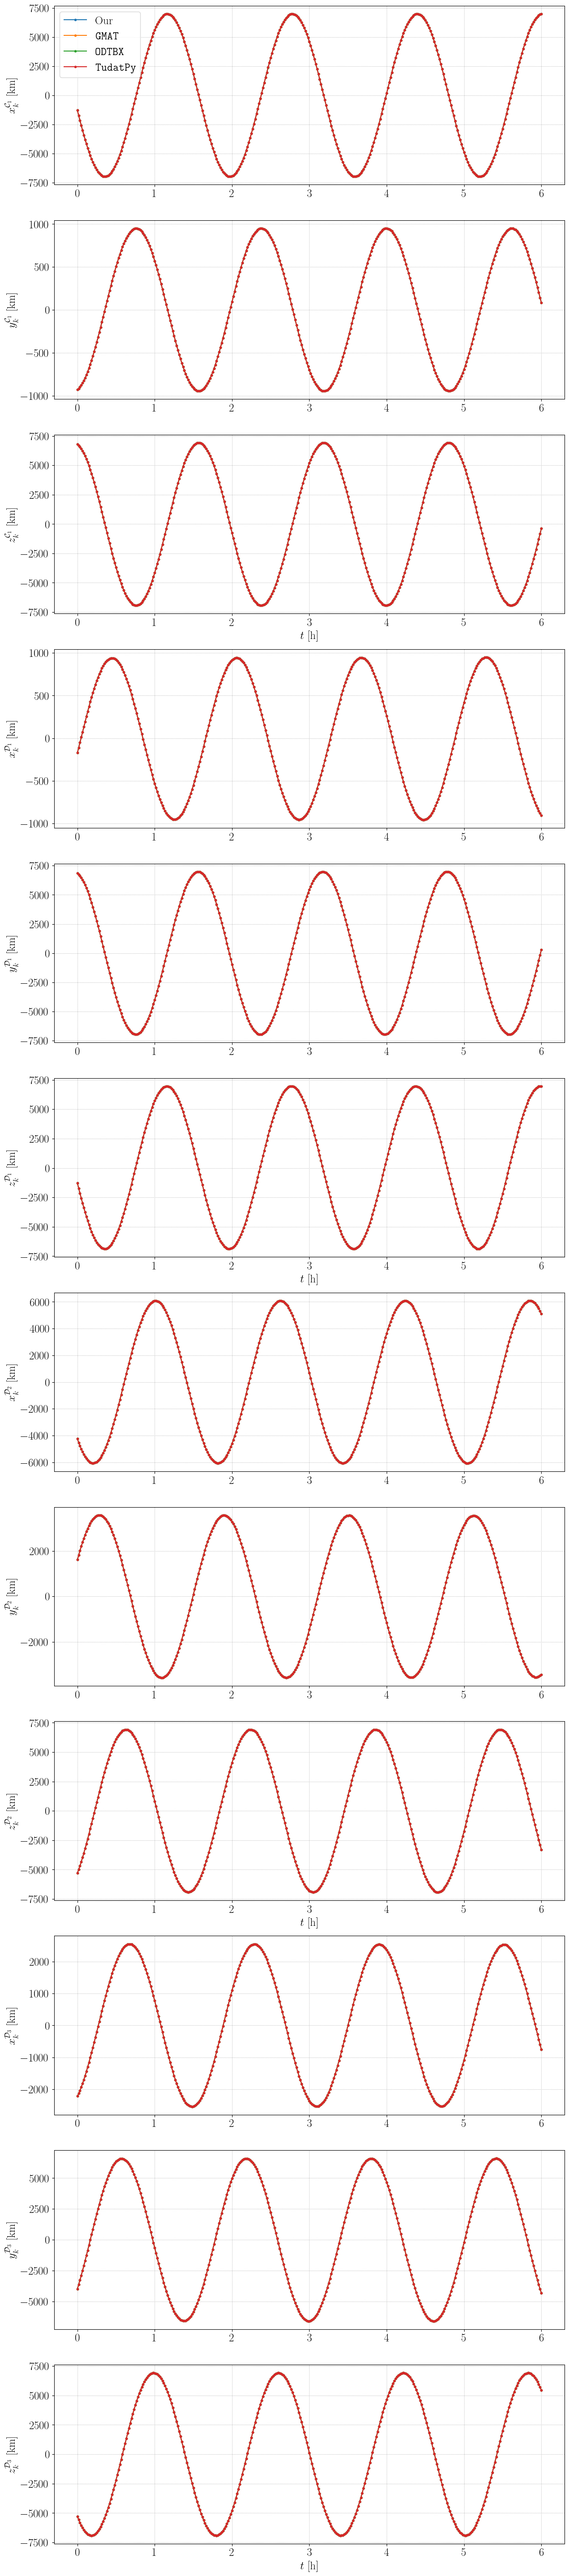

In [24]:
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(12, 1, figsize=(6.4 * 2, 4.8 * 12))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot for chief
axs[0].plot(t, chief_coords[:, 0], '.-', label='Our')
axs[0].plot(t, chief_gmat_coords[:, 0], '.-', label='\\texttt{GMAT}')
axs[0].plot(t, chief_odtbx_coords[:, 0], '.-', label='\\texttt{ODTBX}')
axs[0].plot(t, chief_tudatpy_coords[:, 0], '.-', label='\\texttt{TudatPy}')
axs[0].set_ylabel("$x_k^{\mathcal{C}_1}$ [km]", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)

axs[1].plot(t, chief_coords[:, 1], '.-', label='Our')
axs[1].plot(t, chief_gmat_coords[:, 1], '.-', label='\\texttt{GMAT}')
axs[1].plot(t, chief_odtbx_coords[:, 1], '.-', label='\\texttt{ODTBX}')
axs[1].plot(t, chief_tudatpy_coords[:, 1], '.-', label='\\texttt{TudatPy}')
axs[1].set_ylabel("$y_k^{\mathcal{C}_1}$ [km]", fontsize=18)
axs[1].grid(linestyle=':')
# axs[1].legend(fontsize=18)

axs[2].plot(t, chief_coords[:, 2], '.-', label='Our')
axs[2].plot(t, chief_gmat_coords[:, 2], '.-', label='\\texttt{GMAT}')
axs[2].plot(t, chief_odtbx_coords[:, 2], '.-', label='\\texttt{ODTBX}')
axs[2].plot(t, chief_tudatpy_coords[:, 2], '.-', label='\\texttt{TudatPy}')
axs[2].set_xlabel("$t$ [h]", fontsize=18)
axs[2].set_ylabel("$z_k^{\mathcal{C}_1}$ [km]", fontsize=18)
axs[2].grid(linestyle=':')
# axs[2].legend(fontsize=18)

# Plot for deputy 1
axs[3].plot(t, deputy1_coords[:, 0], '.-', label='Our')
axs[3].plot(t, deputy1_gmat_coords[:, 0], '.-', label='\\texttt{GMAT}')
axs[3].plot(t, deputy1_odtbx_coords[:, 0], '.-', label='\\texttt{ODTBX}')
axs[3].plot(t, deputy1_tudatpy_coords[:, 0], '.-', label='\\texttt{TudatPy}')
axs[3].set_ylabel("$x_k^{\mathcal{D}_1}$ [km]", fontsize=18)
axs[3].grid(linestyle=':')
# axs[3].legend(fontsize=18)

axs[4].plot(t, deputy1_coords[:, 1], '.-', label='Our')
axs[4].plot(t, deputy1_gmat_coords[:, 1], '.-', label='\\texttt{GMAT}')
axs[4].plot(t, deputy1_odtbx_coords[:, 1], '.-', label='\\texttt{ODTBX}')
axs[4].plot(t, deputy1_tudatpy_coords[:, 1], '.-', label='\\texttt{TudatPy}')
axs[4].set_ylabel("$y_k^{\mathcal{D}_1}$ [km]", fontsize=18)
axs[4].grid(linestyle=':')
# axs[4].legend(fontsize=18)

axs[5].plot(t, deputy1_coords[:, 2], '.-', label='Our')
axs[5].plot(t, deputy1_gmat_coords[:, 2], '.-', label='\\texttt{GMAT}')
axs[5].plot(t, deputy1_odtbx_coords[:, 2], '.-', label='\\texttt{ODTBX}')
axs[5].plot(t, deputy1_tudatpy_coords[:, 2], '.-', label='\\texttt{TudatPy}')
axs[5].set_xlabel("$t$ [h]", fontsize=18)
axs[5].set_ylabel("$z_k^{\mathcal{D}_1}$ [km]", fontsize=18)
axs[5].grid(linestyle=':')
# axs[5].legend(fontsize=18)

# Plot for deputy 2
axs[6].plot(t, deputy2_coords[:, 0], '.-', label='Our')
axs[6].plot(t, deputy2_gmat_coords[:, 0], '.-', label='\\texttt{GMAT}')
axs[6].plot(t, deputy2_odtbx_coords[:, 0], '.-', label='\\texttt{ODTBX}')
axs[6].plot(t, depuy2_tudatpy_coords[:, 0], '.-', label='\\texttt{TudatPy}')
axs[6].set_ylabel("$x_k^{\mathcal{D}_2}$ [km]", fontsize=18)
axs[6].grid(linestyle=':')
# axs[6].legend(fontsize=18)

axs[7].plot(t, deputy2_coords[:, 1], '.-', label='Our')
axs[7].plot(t, deputy2_gmat_coords[:, 1], '.-', label='\\texttt{GMAT}')
axs[7].plot(t, deputy2_odtbx_coords[:, 1], '.-', label='\\texttt{ODTBX}')
axs[7].plot(t, depuy2_tudatpy_coords[:, 1], '.-', label='\\texttt{TudatPy}')
axs[7].set_ylabel("$y_k^{\mathcal{D}_2}$ [km]", fontsize=18)
axs[7].grid(linestyle=':')
# axs[7].legend(fontsize=18)

axs[8].plot(t, deputy2_coords[:, 2], '.-', label='Our')
axs[8].plot(t, deputy2_gmat_coords[:, 2], '.-', label='\\texttt{GMAT}')
axs[8].plot(t, deputy2_odtbx_coords[:, 2], '.-', label='\\texttt{ODTBX}')
axs[8].plot(t, depuy2_tudatpy_coords[:, 2], '.-', label='\\texttt{TudatPy}')
axs[8].set_xlabel("$t$ [h]", fontsize=18)
axs[8].set_ylabel("$z_k^{\mathcal{D}_2}$ [km]", fontsize=18)
axs[8].grid(linestyle=':')
# axs[8].legend(fontsize=18)

# Plot for deputy 3
axs[9].plot(t, deputy3_coords[:, 0], '.-', label='Our')
axs[9].plot(t, deputy3_gmat_coords[:, 0], '.-', label='\\texttt{GMAT}')
axs[9].plot(t, deputy3_odtbx_coords[:, 0], '.-', label='\\texttt{ODTBX}')
axs[9].plot(t, deputy3_tudatpy_coords[:, 0], '.-', label='\\texttt{TudatPy}')
axs[9].set_ylabel("$x_k^{\mathcal{D}_3}$ [km]", fontsize=18)
axs[9].grid(linestyle=':')
# axs[9].legend(fontsize=18)

axs[10].plot(t, deputy3_coords[:, 1], '.-', label='Our')
axs[10].plot(t, deputy3_gmat_coords[:, 1], '.-', label='\\texttt{GMAT}')
axs[10].plot(t, deputy3_odtbx_coords[:, 1], '.-', label='\\texttt{ODTBX}')
axs[10].plot(t, deputy3_tudatpy_coords[:, 1], '.-', label='\\texttt{TudatPy}')
axs[10].set_ylabel("$y_k^{\mathcal{D}_3}$ [km]", fontsize=18)
axs[10].grid(linestyle=':')
# axs[10].legend(fontsize=18)

axs[11].plot(t, deputy3_coords[:, 2], '.-', label='Our')
axs[11].plot(t, deputy3_gmat_coords[:, 2], '.-', label='\\texttt{GMAT}')
axs[11].plot(t, deputy3_odtbx_coords[:, 2], '.-', label='\\texttt{ODTBX}')
axs[11].plot(t, deputy3_tudatpy_coords[:, 2], '.-', label='\\texttt{TudatPy}')
axs[11].set_xlabel("$t$ [h]", fontsize=18)
axs[11].set_ylabel("$z_k^{\mathcal{D}_3}$ [km]", fontsize=18)
axs[11].grid(linestyle=':')
# axs[11].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/coords.png', dpi=300)
plt.show()

In [25]:
# Get the norms of the position vectors 
r_chief_true = np.sqrt(np.sum(chief_coords**2, axis=1))
r_deputy1_true = np.sqrt(np.sum(deputy1_coords**2, axis=1))
r_deputy2_true = np.sqrt(np.sum(deputy2_coords**2, axis=1))
r_deputy3_true = np.sqrt(np.sum(deputy3_coords**2, axis=1))

r_chief_gmat = np.sqrt(np.sum(chief_gmat_coords**2, axis=1))
r_deputy1_gmat = np.sqrt(np.sum(deputy1_gmat_coords**2, axis=1))
r_deputy2_gmat = np.sqrt(np.sum(deputy2_gmat_coords**2, axis=1))
r_deputy3_gmat = np.sqrt(np.sum(deputy3_gmat_coords**2, axis=1))

r_chief_odtbx = np.sqrt(np.sum(chief_odtbx_coords**2, axis=1))
r_deputy1_odtbx = np.sqrt(np.sum(deputy1_odtbx_coords**2, axis=1))
r_deputy2_odtbx = np.sqrt(np.sum(deputy2_odtbx_coords**2, axis=1))
r_deputy3_odtbx = np.sqrt(np.sum(deputy3_odtbx_coords**2, axis=1))

r_chief_tudatpy = np.sqrt(np.sum(chief_tudatpy_coords**2, axis=1))
r_deputy1_tudatpy = np.sqrt(np.sum(deputy1_tudatpy_coords**2, axis=1))
r_deputy2_tudatpy = np.sqrt(np.sum(depuy2_tudatpy_coords**2, axis=1))
r_deputy3_tudatpy = np.sqrt(np.sum(deputy3_tudatpy_coords**2, axis=1))

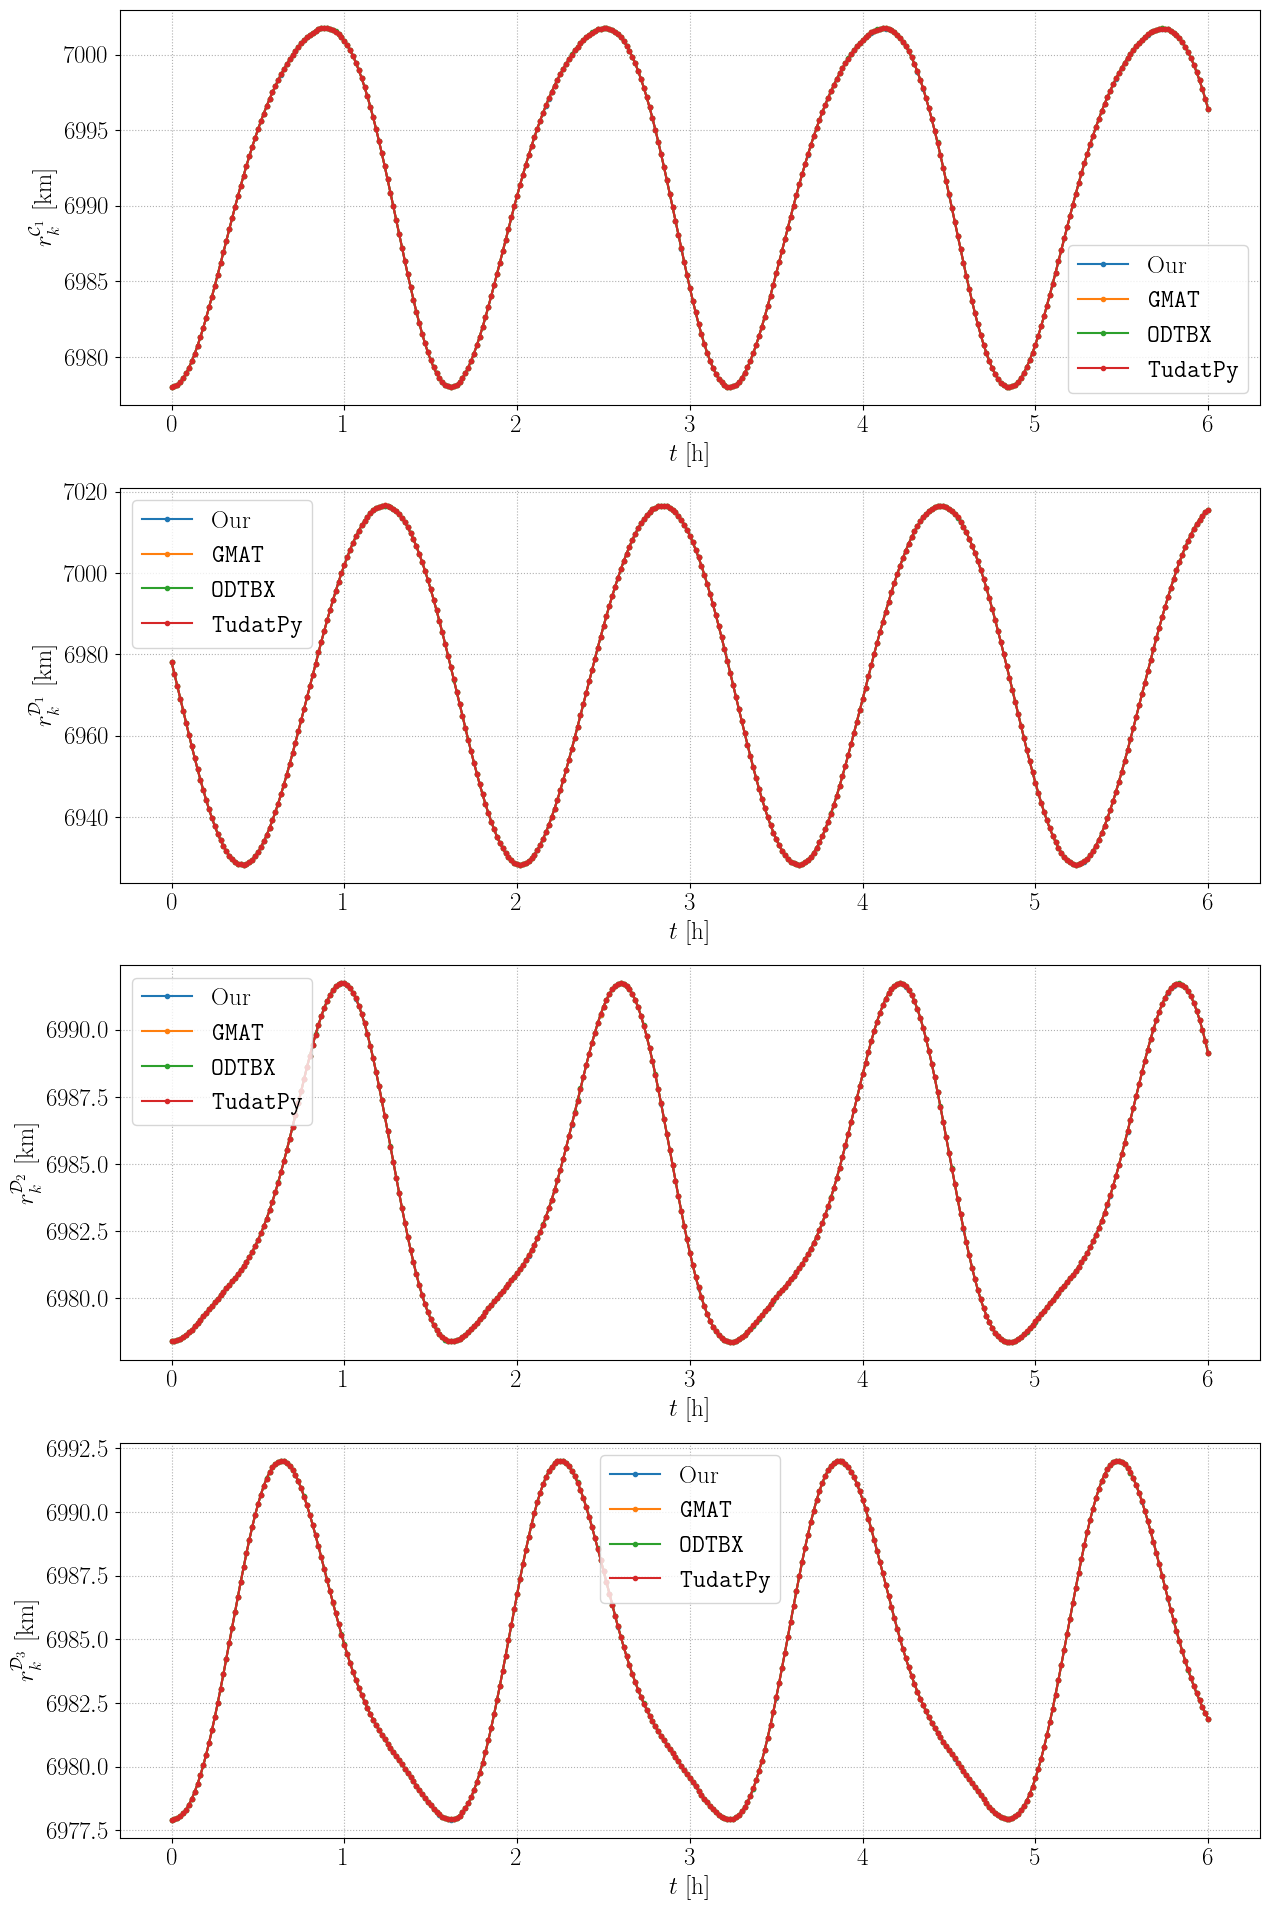

In [26]:
# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(4, 1, figsize=(6.4 * 2, 4.8 * 4))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot Our and GMAT for chief
axs[0].plot(t, r_chief_true, '.-', label='Our')
axs[0].plot(t, r_chief_gmat, '.-', label='\\texttt{GMAT}')
axs[0].plot(t, r_chief_odtbx, '.-', label='\\texttt{ODTBX}')
axs[0].plot(t, r_chief_tudatpy, '.-', label='\\texttt{TudatPy}')
axs[0].set_xlabel("$t$ [h]", fontsize=18)
axs[0].set_ylabel("$r_k^{\mathcal{C}_1}$ [km]", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)

# Plot Our and GMAT for deputy 1
axs[1].plot(t, r_deputy1_true, '.-', label='Our')
axs[1].plot(t, r_deputy1_gmat, '.-', label='\\texttt{GMAT}')
axs[1].plot(t, r_deputy1_odtbx, '.-', label='\\texttt{ODTBX}')
axs[1].plot(t, r_deputy1_tudatpy, '.-', label='\\texttt{TudatPy}')
axs[1].set_xlabel("$t$ [h]", fontsize=18)
axs[1].set_ylabel("$r_k^{\mathcal{D}_1}$ [km]", fontsize=18)
axs[1].grid(linestyle=':')
axs[1].legend(fontsize=18)

# Plot Our and GMAT for deputy 2
axs[2].plot(t, r_deputy2_true, '.-', label='Our')
axs[2].plot(t, r_deputy2_gmat, '.-', label='\\texttt{GMAT}')
axs[2].plot(t, r_deputy2_odtbx, '.-', label='\\texttt{ODTBX}')
axs[2].plot(t, r_deputy2_tudatpy, '.-', label='\\texttt{TudatPy}')
axs[2].set_xlabel("$t$ [h]", fontsize=18)
axs[2].set_ylabel("$r_k^{\mathcal{D}_2}$ [km]", fontsize=18)
axs[2].grid(linestyle=':')
axs[2].legend(fontsize=18)

# Plot Our and GMAT for deputy 3
axs[3].plot(t, r_deputy3_true, '.-', label='Our')
axs[3].plot(t, r_deputy3_gmat, '.-', label='\\texttt{GMAT}')
axs[3].plot(t, r_deputy3_odtbx, '.-', label='\\texttt{ODTBX}')
axs[3].plot(t, r_deputy3_tudatpy, '.-', label='\\texttt{TudatPy}')
axs[3].set_xlabel("$t$ [h]", fontsize=18)
axs[3].set_ylabel("$r_k^{\mathcal{D}_3}$ [km]", fontsize=18)
axs[3].grid(linestyle=':')
axs[3].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/r_norm.png', dpi=300)
plt.show()

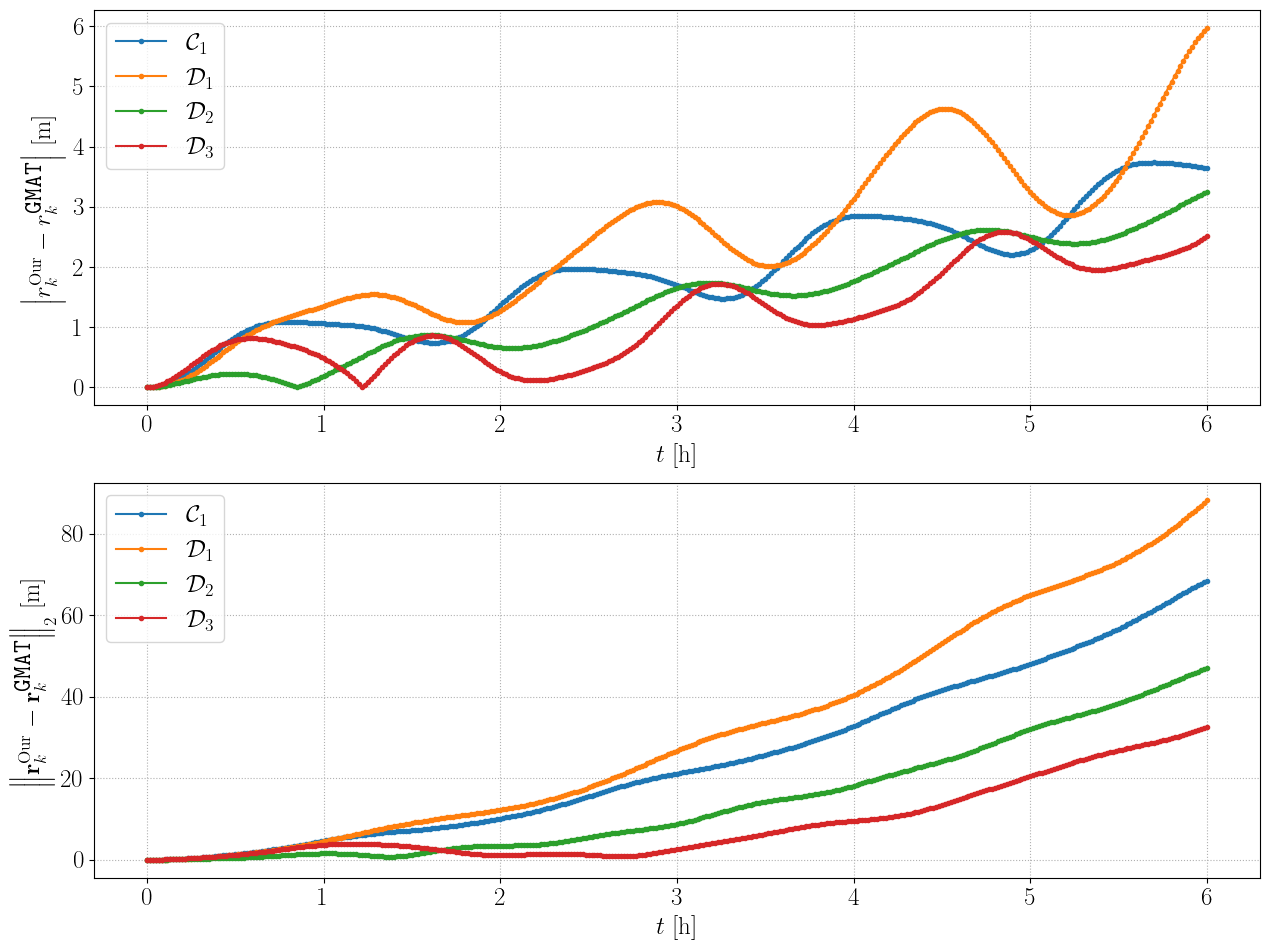

RMSE for chief: 31.805292711576186 m
RMSE for deputy 1: 40.955636474753994 m
RMSE for deputy 2: 20.016627969257197 m
RMSE for deputy 3: 12.866665467076995 m


In [27]:
# Calculate the deviations
dev_chief = np.sqrt(np.sum((chief_coords - chief_gmat_coords) ** 2, axis=1))
dev_deputy1 = np.sqrt(np.sum((deputy1_coords - deputy1_gmat_coords) ** 2, axis=1))
dev_deputy2 = np.sqrt(np.sum((deputy2_coords - deputy2_gmat_coords) ** 2, axis=1))
dev_deputy3 = np.sqrt(np.sum((deputy3_coords - deputy3_gmat_coords) ** 2, axis=1))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 1, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs[0].plot(t, np.abs(r_chief_true - r_chief_gmat) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[0].plot(t, np.abs(r_deputy1_true - r_deputy1_gmat) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[0].plot(t, np.abs(r_deputy2_true - r_deputy2_gmat) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[0].plot(t, np.abs(r_deputy3_true - r_deputy3_gmat) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[0].set_xlabel("$t$ [h]", fontsize=18)
axs[0].set_ylabel("$\left|r_k^\mathrm{Our} - r_k^\\texttt{GMAT}\\right|$ [m]", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)

# Plot relative errors
axs[1].plot(t, dev_chief * 1e3, '.-', label='$\mathcal{C}_1$')
axs[1].plot(t, dev_deputy1 * 1e3, '.-', label='$\mathcal{D}_1$')
axs[1].plot(t, dev_deputy2 * 1e3, '.-', label='$\mathcal{D}_2$')
axs[1].plot(t, dev_deputy3 * 1e3, '.-', label='$\mathcal{D}_3$')
axs[1].set_xlabel("$t$ [h]", fontsize=18)
axs[1].set_ylabel("$\left\|\mathbf{r}_k^\mathrm{Our} - \mathbf{r}_k^\\texttt{GMAT}\\right\|_2$ [m]", fontsize=18)
axs[1].grid(linestyle=':')
axs[1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/devs_our_gmat.png', dpi=300)
plt.show()

rmse_chief = np.sqrt(np.mean(dev_chief**2))
rmse_deputy1 = np.sqrt(np.mean(dev_deputy1**2))
rmse_deputy2 = np.sqrt(np.mean(dev_deputy2**2))
rmse_deputy3 = np.sqrt(np.mean(dev_deputy3**2))

print(f"RMSE for chief: {rmse_chief * 1e3} m")
print(f"RMSE for deputy 1: {rmse_deputy1 * 1e3} m")
print(f"RMSE for deputy 2: {rmse_deputy2 * 1e3} m")
print(f"RMSE for deputy 3: {rmse_deputy3 * 1e3} m")

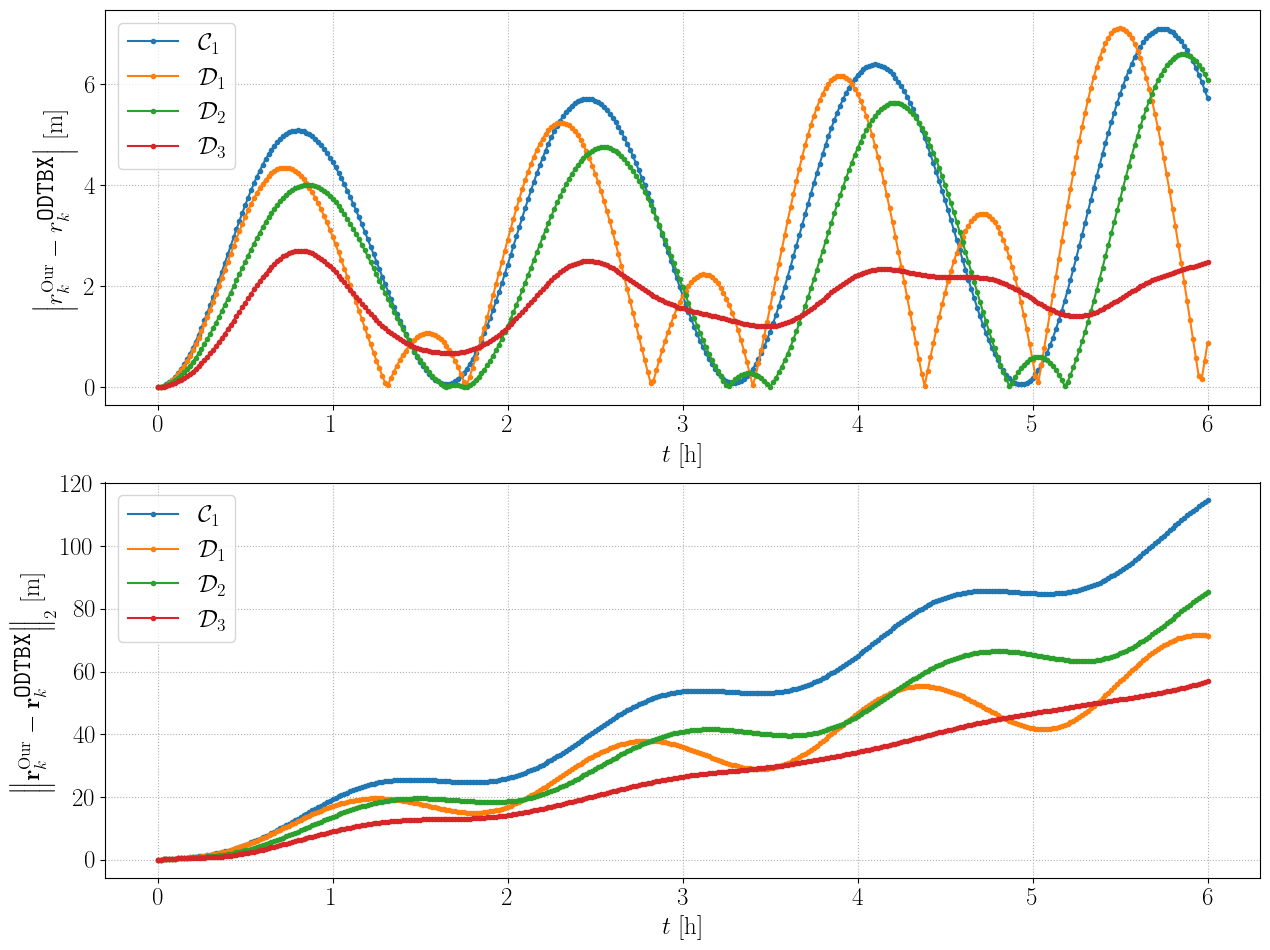

RMSE for chief: 59.3932130748421 m
RMSE for deputy 1: 37.568312566057095 m
RMSE for deputy 2: 43.90087305618266 m
RMSE for deputy 3: 31.17396217230642 m


In [28]:
# Calculate the deviations
dev_chief = np.sqrt(np.sum((chief_coords - chief_odtbx_coords) ** 2, axis=1))
dev_deputy1 = np.sqrt(np.sum((deputy1_coords - deputy1_odtbx_coords) ** 2, axis=1))
dev_deputy2 = np.sqrt(np.sum((deputy2_coords - deputy2_odtbx_coords) ** 2, axis=1))
dev_deputy3 = np.sqrt(np.sum((deputy3_coords - deputy3_odtbx_coords) ** 2, axis=1))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 1, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs[0].plot(t, np.abs(r_chief_true - r_chief_odtbx) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[0].plot(t, np.abs(r_deputy1_true - r_deputy1_odtbx) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[0].plot(t, np.abs(r_deputy2_true - r_deputy2_odtbx) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[0].plot(t, np.abs(r_deputy3_true - r_deputy3_odtbx) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[0].set_xlabel("$t$ [h]", fontsize=18)
axs[0].set_ylabel("$\left|r_k^\mathrm{Our} - r_k^\\texttt{ODTBX}\\right|$ [m]", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)

# Plot relative errors
axs[1].plot(t, dev_chief * 1e3, '.-', label='$\mathcal{C}_1$')
axs[1].plot(t, dev_deputy1 * 1e3, '.-', label='$\mathcal{D}_1$')
axs[1].plot(t, dev_deputy2 * 1e3, '.-', label='$\mathcal{D}_2$')
axs[1].plot(t, dev_deputy3 * 1e3, '.-', label='$\mathcal{D}_3$')
axs[1].set_xlabel("$t$ [h]", fontsize=18)
axs[1].set_ylabel("$\left\|\mathbf{r}_k^\mathrm{Our} - \mathbf{r}_k^\\texttt{ODTBX}\\right\|_2$ [m]", fontsize=18)
axs[1].grid(linestyle=':')
axs[1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/devs_our_odtbx.png', dpi=300)
plt.show()

rmse_chief = np.sqrt(np.mean(dev_chief**2))
rmse_deputy1 = np.sqrt(np.mean(dev_deputy1**2))
rmse_deputy2 = np.sqrt(np.mean(dev_deputy2**2))
rmse_deputy3 = np.sqrt(np.mean(dev_deputy3**2))

print(f"RMSE for chief: {rmse_chief * 1e3} m")
print(f"RMSE for deputy 1: {rmse_deputy1 * 1e3} m")
print(f"RMSE for deputy 2: {rmse_deputy2 * 1e3} m")
print(f"RMSE for deputy 3: {rmse_deputy3 * 1e3} m")

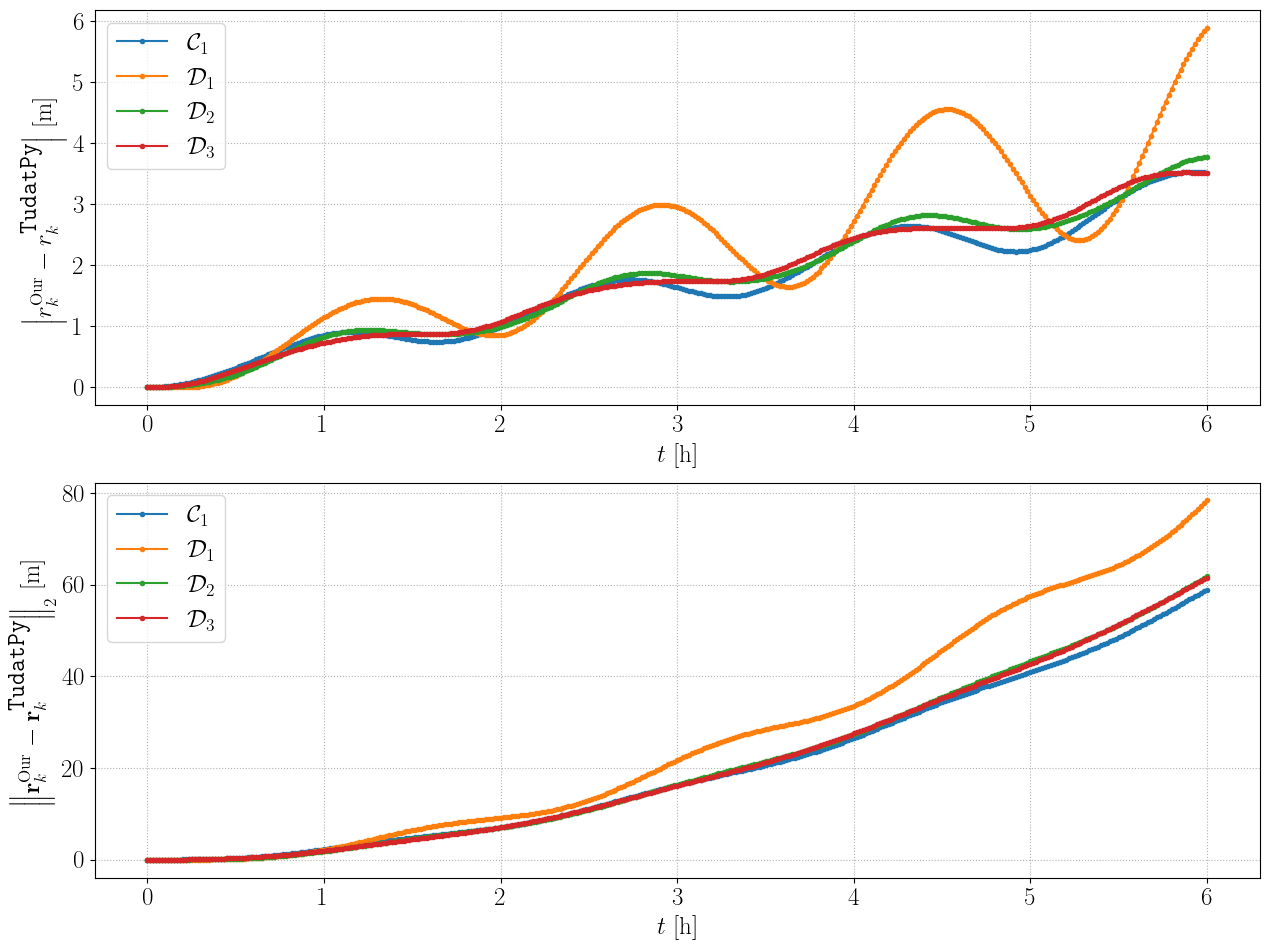

RMSE for chief: 26.59363409518137 m
RMSE for deputy 1: 35.515259117631786 m
RMSE for deputy 2: 27.79731134227461 m
RMSE for deputy 3: 27.68896991348976 m


In [29]:
# Calculate the deviations
dev_chief = np.sqrt(np.sum((chief_coords - chief_tudatpy_coords) ** 2, axis=1))
dev_deputy1 = np.sqrt(np.sum((deputy1_coords - deputy1_tudatpy_coords) ** 2, axis=1))
dev_deputy2 = np.sqrt(np.sum((deputy2_coords - depuy2_tudatpy_coords) ** 2, axis=1))
dev_deputy3 = np.sqrt(np.sum((deputy3_coords - deputy3_tudatpy_coords) ** 2, axis=1))

# Create figure and axes with specified size and grid layout
fig, axs = plt.subplots(2, 1, figsize=(6.4 * 2, 4.8 * 2))

# Apply fontsize to ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=18)  # major ticks
    ax.tick_params(axis='both', which='minor', labelsize=18)  # minor ticks

# Plot absolute errors
axs[0].plot(t, np.abs(r_chief_true - r_chief_tudatpy) * 1e3, '.-', label='$\mathcal{C}_1$')
axs[0].plot(t, np.abs(r_deputy1_true - r_deputy1_tudatpy) * 1e3, '.-', label='$\mathcal{D}_1$')
axs[0].plot(t, np.abs(r_deputy2_true - r_deputy2_tudatpy) * 1e3, '.-', label='$\mathcal{D}_2$')
axs[0].plot(t, np.abs(r_deputy3_true - r_deputy3_tudatpy) * 1e3, '.-', label='$\mathcal{D}_3$')
axs[0].set_xlabel("$t$ [h]", fontsize=18)
axs[0].set_ylabel("$\left|r_k^\mathrm{Our} - r_k^\\texttt{TudatPy}\\right|$ [m]", fontsize=18)
axs[0].grid(linestyle=':')
axs[0].legend(fontsize=18)

# Plot relative errors
axs[1].plot(t, dev_chief * 1e3, '.-', label='$\mathcal{C}_1$')
axs[1].plot(t, dev_deputy1 * 1e3, '.-', label='$\mathcal{D}_1$')
axs[1].plot(t, dev_deputy2 * 1e3, '.-', label='$\mathcal{D}_2$')
axs[1].plot(t, dev_deputy3 * 1e3, '.-', label='$\mathcal{D}_3$')
axs[1].set_xlabel("$t$ [h]", fontsize=18)
axs[1].set_ylabel("$\left\|\mathbf{r}_k^\mathrm{Our} - \mathbf{r}_k^\\texttt{TudatPy}\\right\|_2$ [m]", fontsize=18)
axs[1].grid(linestyle=':')
axs[1].legend(fontsize=18)

plt.tight_layout()  # Adjust layout to fit labels
if save_figs:
    plt.savefig('../figs/diff_x_true/devs_our_tudatpy.png', dpi=300)
plt.show()

rmse_chief = np.sqrt(np.mean(dev_chief**2))
rmse_deputy1 = np.sqrt(np.mean(dev_deputy1**2))
rmse_deputy2 = np.sqrt(np.mean(dev_deputy2**2))
rmse_deputy3 = np.sqrt(np.mean(dev_deputy3**2))

print(f"RMSE for chief: {rmse_chief * 1e3} m")
print(f"RMSE for deputy 1: {rmse_deputy1 * 1e3} m")
print(f"RMSE for deputy 2: {rmse_deputy2 * 1e3} m")
print(f"RMSE for deputy 3: {rmse_deputy3 * 1e3} m")